In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
housing = pd.read_csv("data_house.csv")
housing.head()

,Gia,So_Phong_Ngu,So_Phong_Tam,Dien_Tich
0,310.0,3,1.0,1430
1,650.0,4,3.0,2950
2,233.0,3,2.0,1710
3,580.5,3,2.5,2320
4,535.0,3,1.0,1090


In [4]:
housing_price_area = housing[["Gia", "Dien_Tich"]]
housing_price_area.head()

,Gia,Dien_Tich
0,310.0,1430
1,650.0,2950
2,233.0,1710
3,580.5,2320
4,535.0,1090


In [5]:
housing_price_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gia        20 non-null     float64
 1   Dien_Tich  20 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 448.0 bytes


In [6]:
housing_price_area.isnull().sum()

Gia          0
Dien_Tich    0
dtype: int64

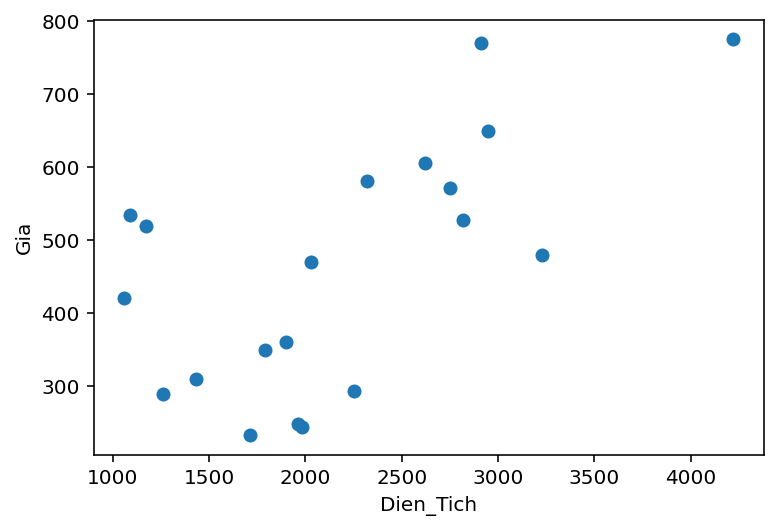

In [7]:
plt.scatter(housing_price_area["Dien_Tich"], housing_price_area["Gia"])
plt.xlabel('Dien_Tich')
plt.ylabel('Gia')
plt.show()

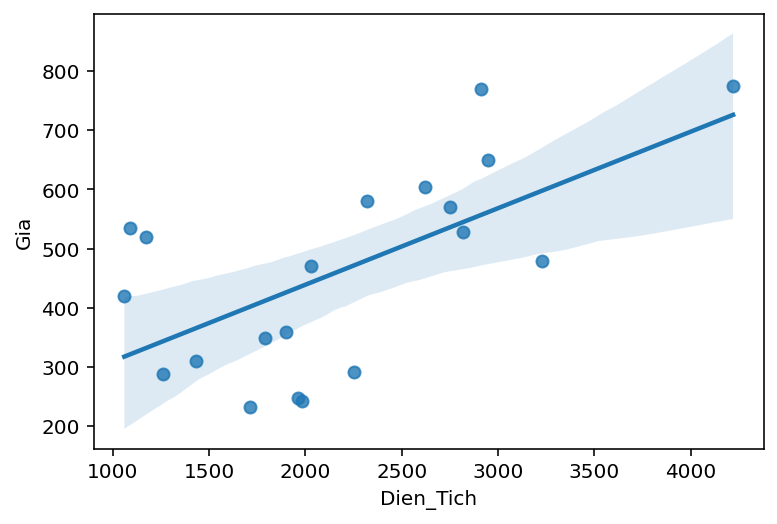

In [8]:
import seaborn as sns 
sns.regplot(data='housing_price_area', x=housing_price_area["Dien_Tich"], y=housing_price_area["Gia"])
plt.show()

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
X = housing_price_area[["Dien_Tich"]]
y = housing_price_area.Gia

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [13]:
b1 = model.intercept_
b2 = model.coef_
print("Intercept (hệ số chẵn): ", b1)
print("Coef (hệ số go): ", b2)

Intercept (hệ số chẵn):  45.27313363794286
Coef (hệ số go):  [0.18135353]


In [14]:
mse = mean_squared_error(y_test, model.predict(X_test))
rmse = np.sqrt(mse)
print(f'MSE : {mse:.2f}')
print(f'RMSE: {rmse:2f}')

MSE : 30909.67
RMSE: 175.811454


In [15]:
area = 1800
predict = b1 + b2 * area
predict

array([371.70947955])

In [16]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, model.predict(X_test))
print(f'R2 score: {r2:.2f}')

R2 score: -2.47


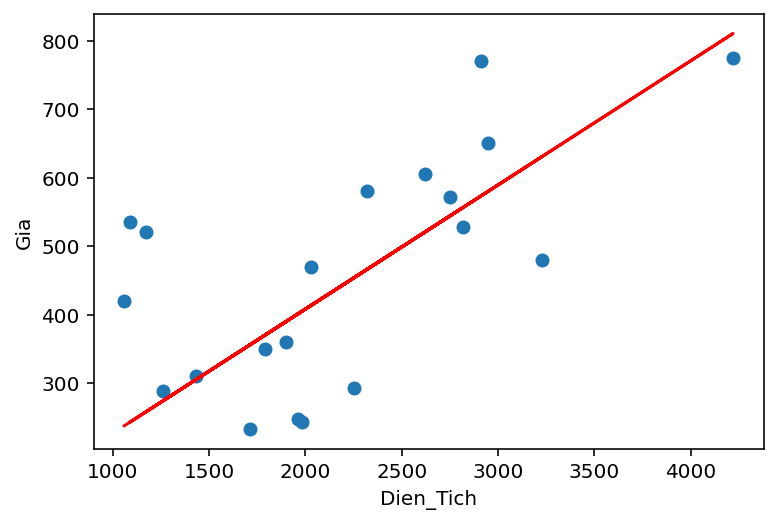

In [17]:
plt.scatter(housing_price_area["Dien_Tich"], housing_price_area['Gia'])
plt.plot(housing_price_area["Dien_Tich"], b1 + b2 * housing_price_area["Dien_Tich"], color='r')
plt.xlabel('Dien_Tich')
plt.ylabel('Gia')

plt.show()

In [18]:
import pandas as pd
df = pd.read_csv("realestate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [19]:
corr_matrix = df.corr()
corr_matrix

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


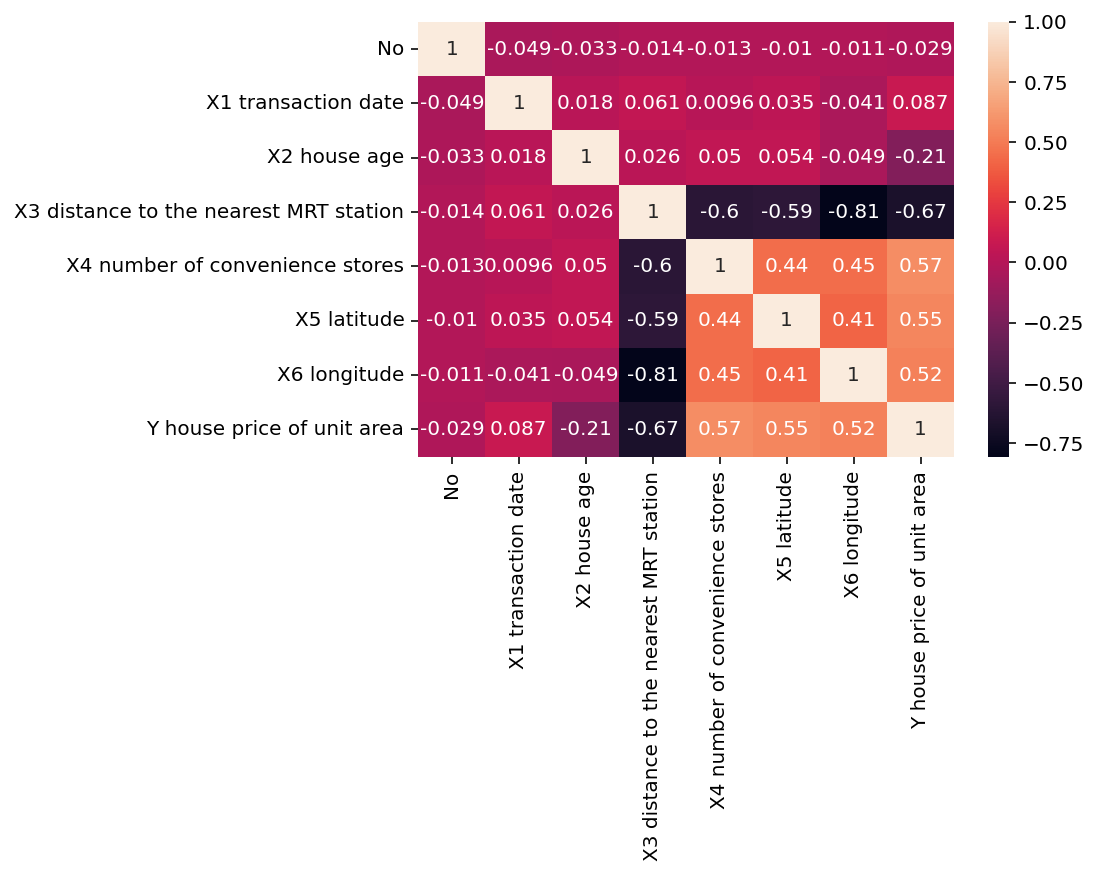

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [21]:
df_new = df.drop(columns=["X1 transaction date","X3 distance to the nearest MRT station","No"], axis=1)
df_new

,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,10,24.98298,121.54024,37.9
1,19.5,9,24.98034,121.53951,42.2
2,13.3,5,24.98746,121.54391,47.3
3,13.3,5,24.98746,121.54391,54.8
4,5.0,5,24.97937,121.54245,43.1
...,...,...,...,...,...
409,13.7,0,24.94155,121.50381,15.4
410,5.6,9,24.97433,121.54310,50.0
411,18.8,7,24.97923,121.53986,40.6
412,8.1,5,24.96674,121.54067,52.5


In [22]:
df_new.isnull().sum()


X2 house age                       0
X4 number of convenience stores    0
X5 latitude                        0
X6 longitude                       0
Y house price of unit area         0
dtype: int64

In [23]:
x = df_new.iloc[:, 0:4]
x

,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,10,24.98298,121.54024
1,19.5,9,24.98034,121.53951
2,13.3,5,24.98746,121.54391
3,13.3,5,24.98746,121.54391
4,5.0,5,24.97937,121.54245
...,...,...,...,...
409,13.7,0,24.94155,121.50381
410,5.6,9,24.97433,121.54310
411,18.8,7,24.97923,121.53986
412,8.1,5,24.96674,121.54067


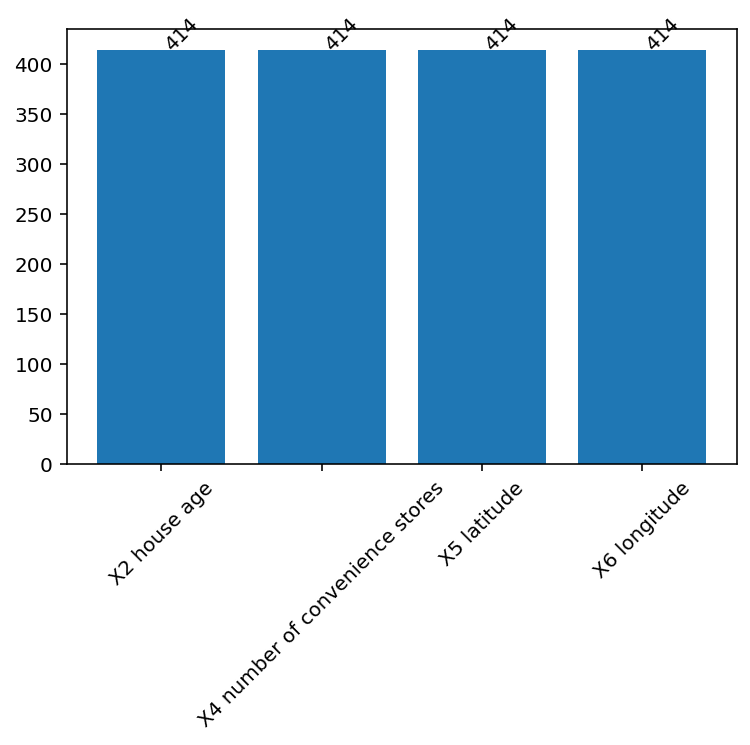

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df_new is defined somewhere in your code
data = [['X2 house age', df_new['X2 house age'].count()],
        ['X4 number of convenience stores', df_new['X4 number of convenience stores'].count()],
        ['X5 latitude', df_new['X5 latitude'].count()],
        ['X6 longitude', df_new['X6 longitude'].count()]]

df_not_null = pd.DataFrame(data, columns=['Name', 'Count'])

fig, ax = plt.subplots()

plt.bar('Name', 'Count', data=df_not_null)

for ix, col in enumerate(df_not_null['Count'].to_numpy()):
    plt.text(ix, col, str(col), rotation=45)

plt.xticks(rotation=45)
plt.show()


In [25]:
# @title
import missingno as msno
x = df_new.iloc[:,0:4]
x


,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,10,24.98298,121.54024
1,19.5,9,24.98034,121.53951
2,13.3,5,24.98746,121.54391
3,13.3,5,24.98746,121.54391
4,5.0,5,24.97937,121.54245
...,...,...,...,...
409,13.7,0,24.94155,121.50381
410,5.6,9,24.97433,121.54310
411,18.8,7,24.97923,121.53986
412,8.1,5,24.96674,121.54067


<Axes: >

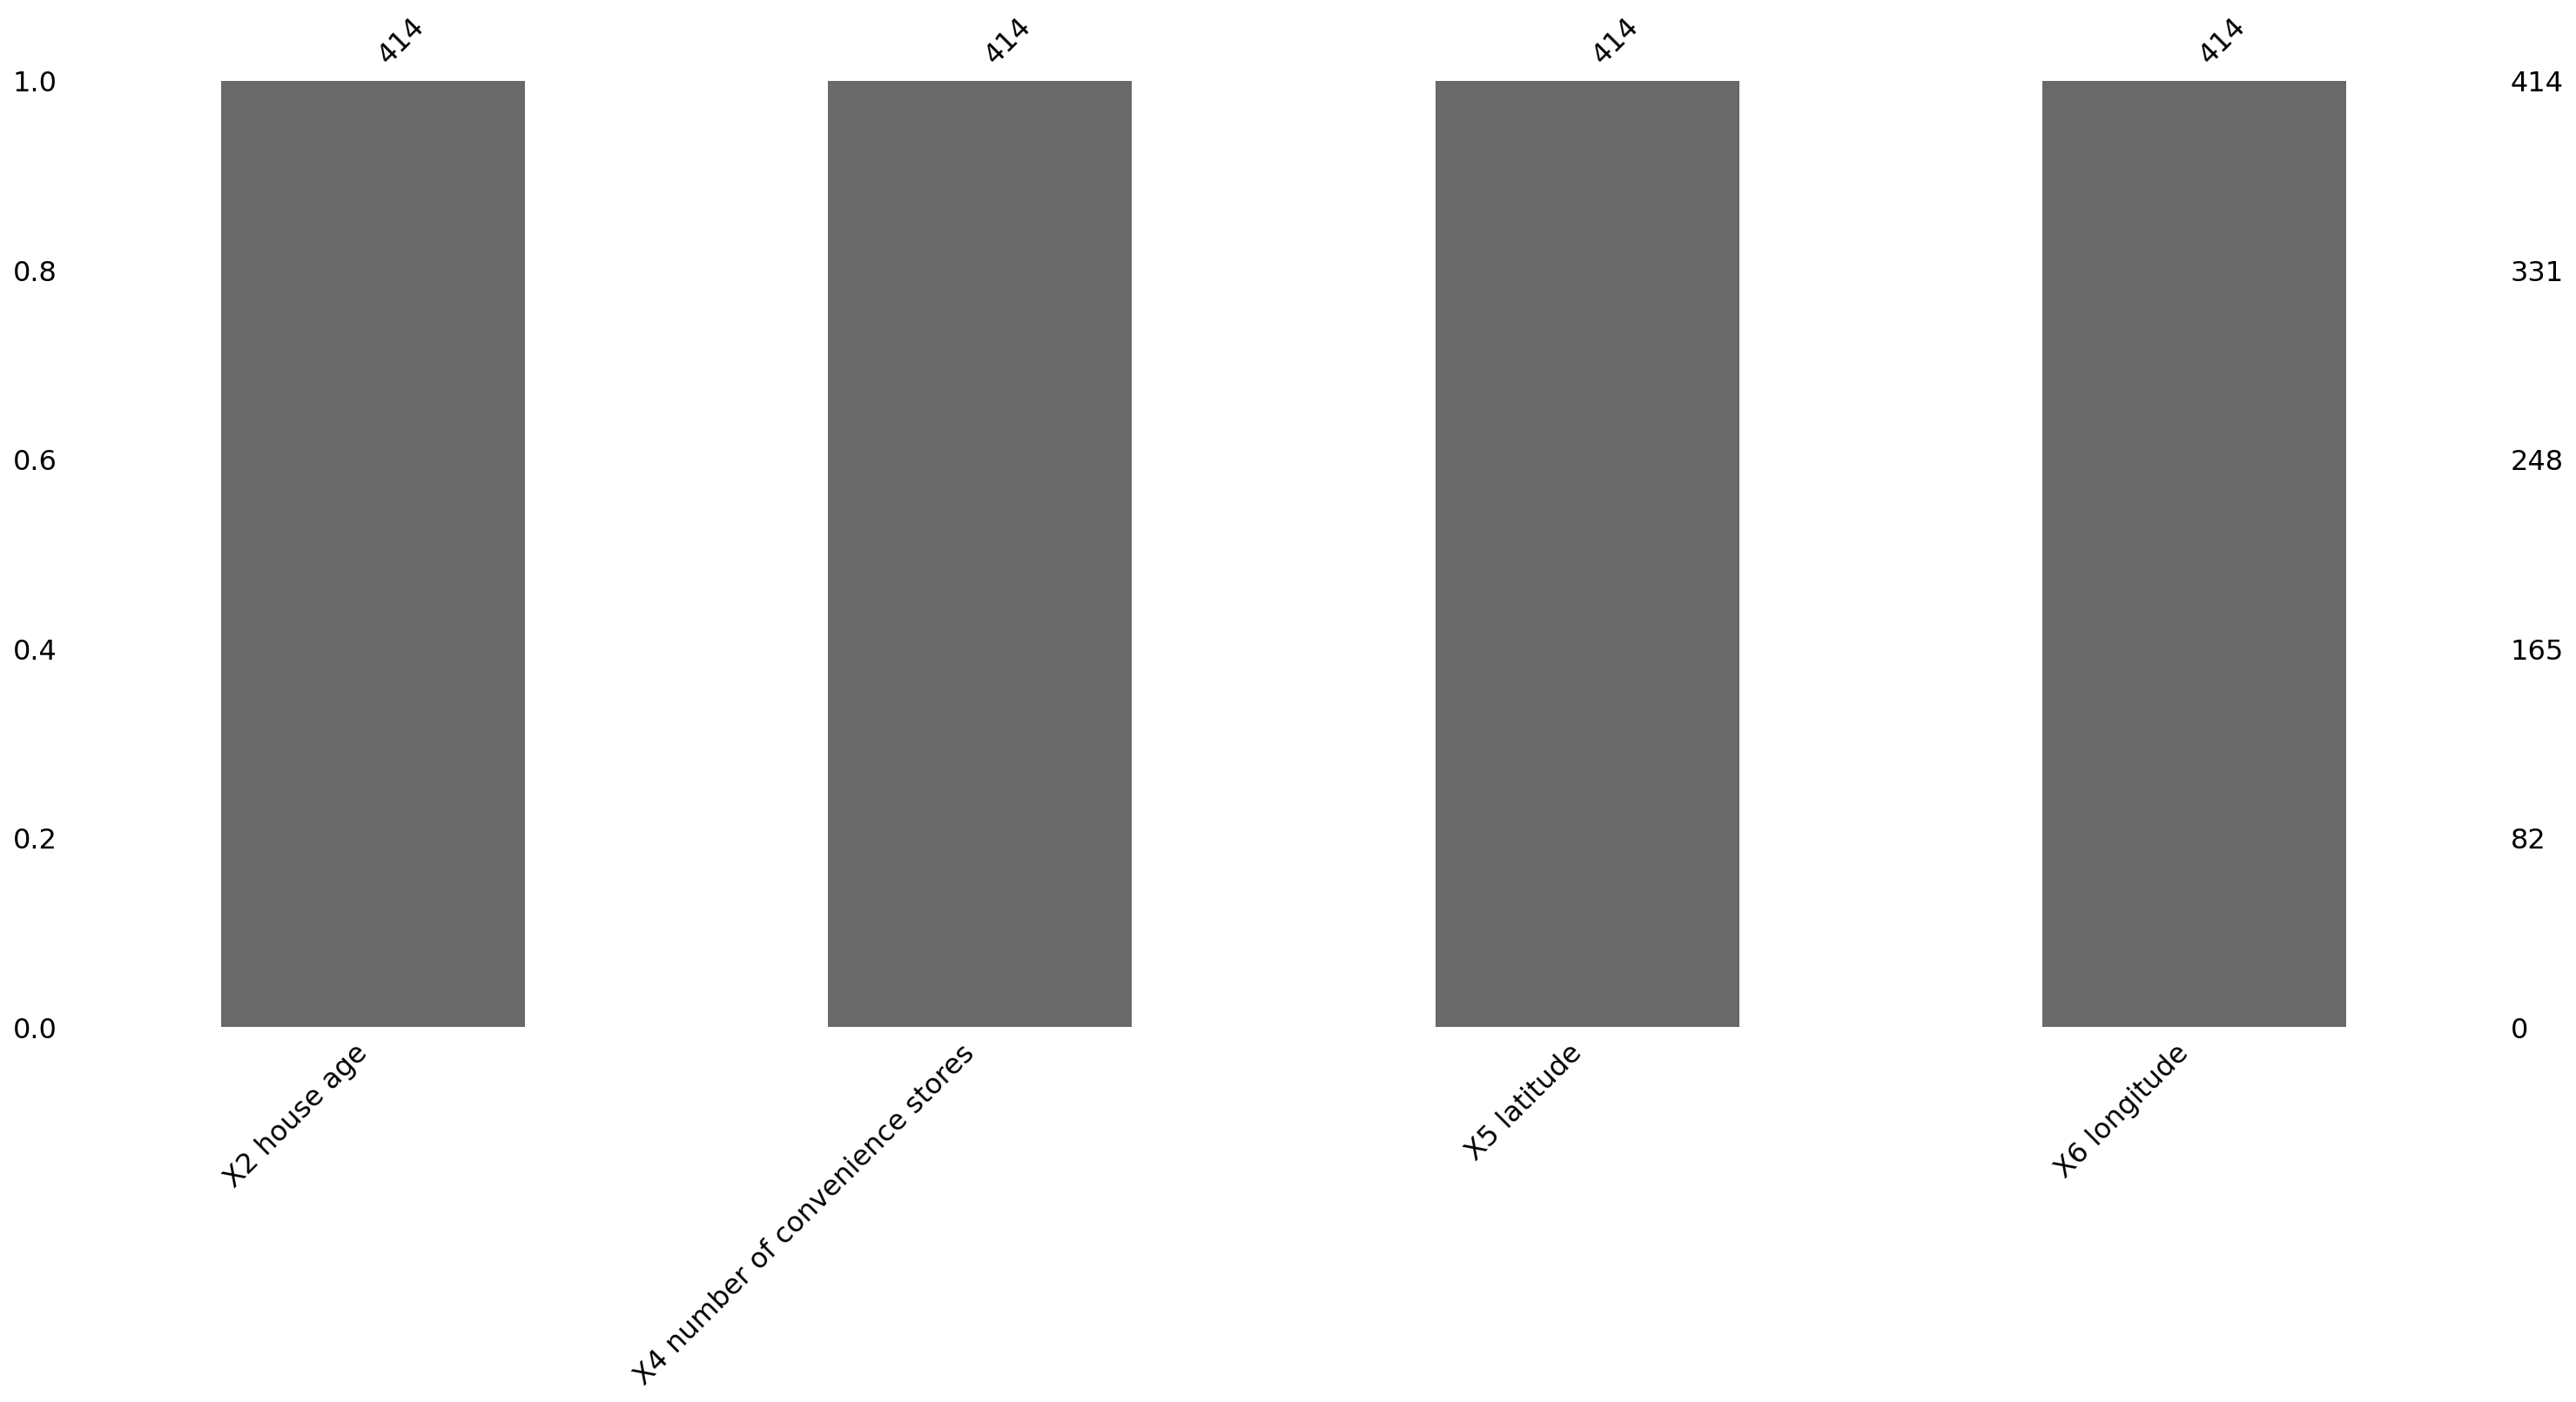

In [26]:
 # @title
msno.bar(x)

[Text(0, 0, 'X2'),
 Text(1, 0, 'X4'),
 Text(2, 0, 'X5'),
 Text(3, 0, 'X6'),
 Text(4, 0, 'Y')]

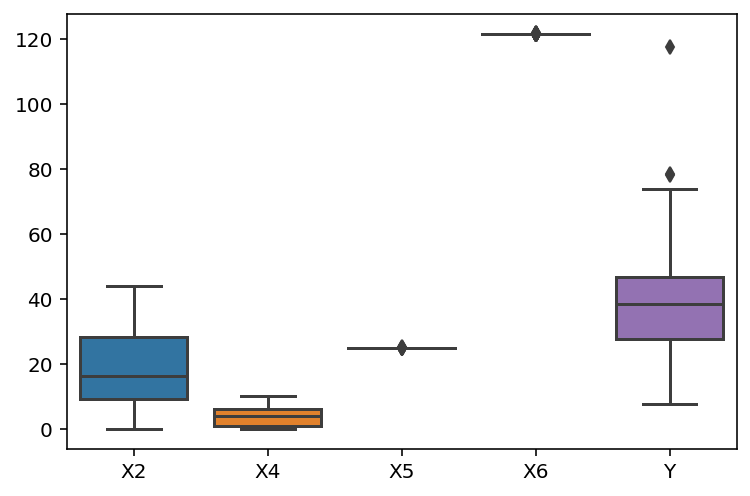

In [27]:
fig = sns.boxplot(data=df_new)
fig.set_xticks(range(5))
fig.set_xticklabels(['X2', 'X4', 'X5', 'X6', 'Y'])

In [28]:
q1 = df_new.quantile(0.25)
q3 = df_new.quantile(0.75)
# Tính IQR
iqr = q3 - q1
iqr


X2 house age                       19.125000
X4 number of convenience stores     5.000000
X5 latitude                         0.014455
X6 longitude                        0.015220
Y house price of unit area         18.900000
dtype: float64

In [29]:
df_without_outlier = df_new[~((df_new < (q1 - 1.5 * iqr)) |(df_new > (q3 + 1.5 * iqr))).any(axis=1)]
df_without_outlier

,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,10,24.98298,121.54024,37.9
1,19.5,9,24.98034,121.53951,42.2
2,13.3,5,24.98746,121.54391,47.3
3,13.3,5,24.98746,121.54391,54.8
4,5.0,5,24.97937,121.54245,43.1
...,...,...,...,...,...
408,18.5,3,24.96330,121.51243,28.1
410,5.6,9,24.97433,121.54310,50.0
411,18.8,7,24.97923,121.53986,40.6
412,8.1,5,24.96674,121.54067,52.5


[Text(0, 0, 'X2'),
 Text(1, 0, 'X4'),
 Text(2, 0, 'X5'),
 Text(3, 0, 'X6'),
 Text(4, 0, 'Y')]

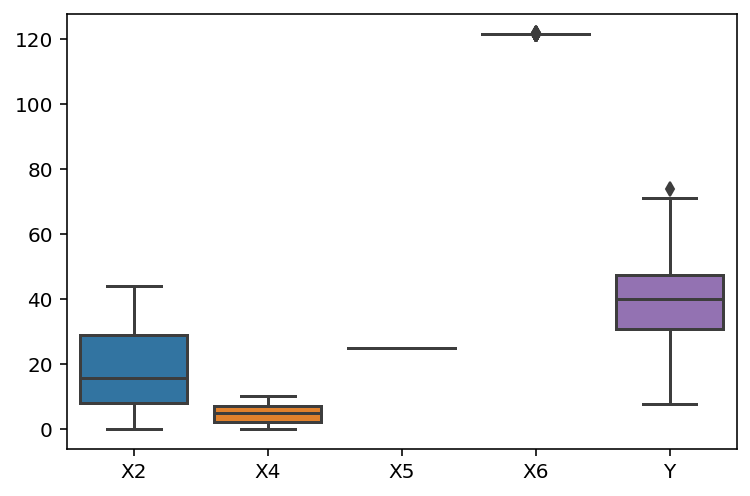

In [30]:
fig = sns.boxplot(data=df_without_outlier)
fig.set_xticks(range(5))
fig.set_xticklabels(['X2', 'X4', 'X5', 'X6', 'Y'])

In [31]:
y = df_without_outlier['Y house price of unit area']
y


0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
408    28.1
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 371, dtype: float64

In [32]:
 from sklearn.model_selection import train_test_split
x_without_outlier = df_without_outlier.iloc[:,0:4]
X_train, X_valid, Y_train, Y_valid = train_test_split(x_without_outlier, y, test_size = 0.2, random_state = 101)


In [33]:
 from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [34]:
regressor.coef_

array([-3.03451439e-01,  1.44280883e+00,  4.58836606e+02,  2.63959238e+02])

In [35]:
print(regressor.coef_)


[-3.03451439e-01  1.44280883e+00  4.58836606e+02  2.63959238e+02]


In [36]:
 regressor.intercept_


-43499.66131673032

In [37]:
pred = regressor.predict(X_valid)

In [38]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(Y_valid, pred))

7.898845664720821

In [39]:
from sklearn.metrics import r2_score
r2_score(Y_valid, pred)

0.4982017724719201